<a href="https://colab.research.google.com/github/hariPrasadCoder/Diamond-Price-Prediction/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIAMOND PRICE PREDICTION

[Click here](https://www.kaggle.com/ritikmaheshwari/diamond-price-prediction) to get the dataset from Kaggle.

## Importing essential libraries:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df = pd.read_csv('diamonds_data.csv')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Checking null values:

In [14]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Checking the categorical features:

In [15]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [16]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [17]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

## Converting the ordinal feature "Cut" to numerical values:

In [18]:
cut_rank = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
df['cut'] = df['cut'].replace(cut_rank)
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Converting the ordinal feature "Clarity" to numerical values:

In [19]:
clarity_rank = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
df['clarity'] = df['clarity'].replace(clarity_rank)
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,J,5,62.8,57.0,336,3.94,3.96,2.48
6,0.24,2,I,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,2,H,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,E,3,65.1,61.0,337,3.87,3.78,2.49
9,0.23,2,H,4,59.4,61.0,338,4.00,4.05,2.39


## Applying One Hot encoding on "Color" feature:

In [20]:
df1 = pd.get_dummies(df.color,prefix='Color',drop_first=True)
df1

,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
53935,0,0,0,0,0,0
53936,0,0,0,0,0,0
53937,0,0,0,0,0,0
53938,0,0,0,1,0,0


In [21]:
df = pd.concat([df,df1],axis=1)
df.drop(['color'],axis=1,inplace=True)
df.head()

,carat,cut,clarity,depth,table,price,x,y,z,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.23,4,1,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,326,3.89,3.84,2.31,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,1


## Dividing the data into X and y:

In [22]:
X = df.drop(['price'],axis=1)
y = df['price']

In [23]:
X.head()

,carat,cut,clarity,depth,table,x,y,z,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.23,4,1,61.5,55.0,3.95,3.98,2.43,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,4.20,4.23,2.63,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,1


In [24]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

## Checking correlations between the features:

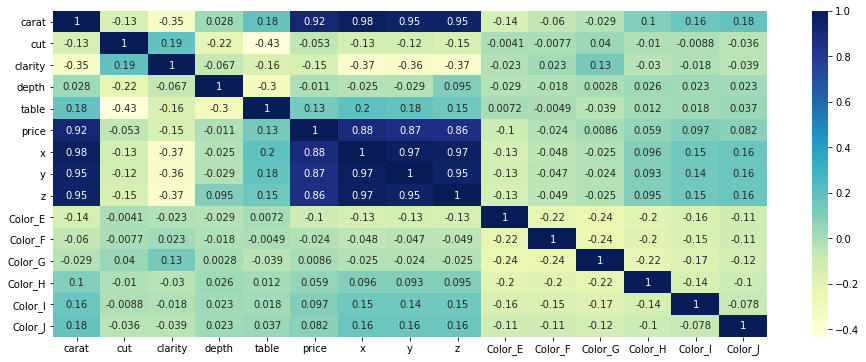

In [25]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

## Splitting the data into Test and Train:

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## 1. Simple Linear Regression (Carat vs Price):

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train[['carat']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = regressor.predict(X_test[['carat']])

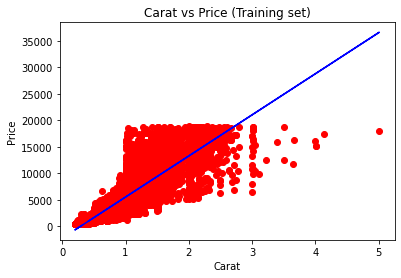

In [29]:
plt.scatter(X_train[['carat']], y_train, color = 'red')
plt.plot(X_train[['carat']], regressor.predict(X_train[['carat']]), color = 'blue')
plt.title('Carat vs Price (Training set)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

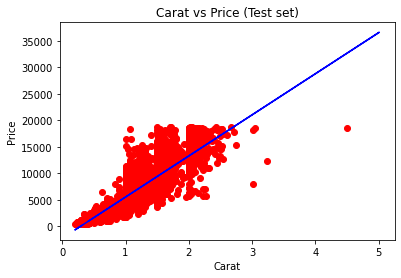

In [30]:
plt.scatter(X_test[['carat']], y_test, color = 'red')
plt.plot(X_train[['carat']], regressor.predict(X_train[['carat']]), color = 'blue')
plt.title('Carat vs Price (Test set)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [31]:
from sklearn.metrics import r2_score
linear_r2_score = r2_score(y_test, y_pred)

## 2. Multiple Linear Regression:

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = regressor.predict(X_test)

In [34]:
from sklearn.metrics import r2_score
multilinear_r2_score = r2_score(y_test, y_pred)

In [35]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
rms

1174.0038229802003

## 3. Ridge Regression:

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [37]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-2552917.7752433224


In [38]:
y_pred = ridge_regressor.predict(X_test)
from sklearn.metrics import r2_score
ridge_r2_score = r2_score(y_test, y_pred)

## 4. Lasso Regression:

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34095615420.43993, tolerance: 84092033.3330649
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30316631178.389713, tolerance: 74017487.42602679
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11668253010.417463, tolerance: 23727266.327994194
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483384415

{'alpha': 1e-15}
-2552917.775410108


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38620183848.55344, tolerance: 85847313.5517395
  positive)


In [40]:
y_pred = lasso_regressor.predict(X_test)
from sklearn.metrics import r2_score
lasso_r2_score = r2_score(y_test, y_pred)

## 5. Polynomial Regression:

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
X_poly_test = poly_reg.fit_transform(X_test)
y_pred = lin_reg_2.predict(X_poly_test)
poly_r2_score = r2_score(y_test, y_pred)

In [43]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)
rms

116346.46547685174

## 6. Support Vector Regression:

In [44]:
X.head()

,carat,cut,clarity,depth,table,x,y,z,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
0,0.23,4,1,61.5,55.0,3.95,3.98,2.43,1,0,0,0,0,0
1,0.21,3,2,59.8,61.0,3.89,3.84,2.31,1,0,0,0,0,0
2,0.23,1,4,56.9,65.0,4.05,4.07,2.31,1,0,0,0,0,0
3,0.29,3,3,62.4,58.0,4.20,4.23,2.63,0,0,0,0,1,0
4,0.31,1,1,63.3,58.0,4.34,4.35,2.75,0,0,0,0,0,1


In [45]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 1)

In [47]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [48]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[:,0:8] = sc_X.fit_transform(X_train[:,0:8])
X_test[:,0:8] = sc_X.transform(X_test[:,0:8])
y_train = sc_y.fit_transform(y_train)

In [49]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test))

In [51]:
y_pred = y_pred.reshape(len(y_pred),1)

In [52]:
y_test

array([[ 564],
       [5914],
       [2562],
       ...,
       [2516],
       [6129],
       [1372]])

In [53]:
svr_r2_score = r2_score(y_test, y_pred)

## 7. Decision Tree:

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [56]:
y_pred = regressor.predict(X_test)

In [57]:
y_pred

array([ 594., 5736., 2440., ..., 2415., 6282., 1295.])

In [58]:
y_test

2714      564
14653    5914
52760    2562
48658     537
14812    5964
         ... 
49568    2131
32163     787
52459    2516
15265    6129
43028    1372
Name: price, Length: 10788, dtype: int64

In [59]:
dt_r2_score = r2_score(y_test, y_pred)

## 8. Random Forest:

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [61]:
y_pred = regressor.predict(X_test)

In [62]:
y_pred

array([ 477.04, 5397.04, 2341.76, ..., 2342.72, 6283.56, 1592.32])

In [63]:
y_test

2714      564
14653    5914
52760    2562
48658     537
14812    5964
         ... 
49568    2131
32163     787
52459    2516
15265    6129
43028    1372
Name: price, Length: 10788, dtype: int64

In [64]:
rf_r2_score = r2_score(y_test, y_pred)

In [65]:
print('Linear Regression - R squared score: ', linear_r2_score)
print('Multiple linear Regression - R squared score: ', multilinear_r2_score)
print('Ridge Regression - R squared score: ', ridge_r2_score)
print('Lasso Regression - R squared score: ', lasso_r2_score)
print('Polynomial Regression - R squared score: ', poly_r2_score)
print('Support Vector Regression - R squared score: ', svr_r2_score)
print('Decision Tree - R squared score: ', dt_r2_score)
print('Random Forest - R squared score: ', rf_r2_score)

Linear Regression - R squared score:  0.8482566296393821
Multiple linear Regression - R squared score:  0.9112987797293217
Ridge Regression - R squared score:  0.9114189846296372
Lasso Regression - R squared score:  0.9114189846296372
Polynomial Regression - R squared score:  -870.1580633512696
Support Vector Regression - R squared score:  0.9771990082764344
Decision Tree - R squared score:  0.9652036738664487
Random Forest - R squared score:  0.9812115542764166


## 9. Neural Networks

In [71]:
X_train

,carat,cut,clarity,depth,table,x,y,z,Color_E,Color_F,Color_G,Color_H,Color_I,Color_J
42836,0.41,4,6,62.3,53.0,4.80,4.77,2.98,0,1,0,0,0,0
9727,1.12,3,1,60.5,59.0,6.79,6.73,4.09,0,1,0,0,0,0
35974,0.42,4,4,60.6,56.0,4.83,4.87,2.94,0,1,0,0,0,0
22501,1.04,3,6,62.5,59.0,6.46,6.41,4.02,1,0,0,0,0,0
3571,0.70,1,4,58.4,60.0,5.84,5.87,3.42,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,0.70,2,3,62.8,59.0,5.56,5.61,3.51,0,0,0,0,1,0
32511,0.40,1,1,63.9,57.0,4.71,4.65,2.99,1,0,0,0,0,0
5192,0.91,2,3,62.7,63.0,6.05,6.00,3.78,0,0,1,0,0,0
12172,1.18,4,4,61.7,56.0,6.79,6.82,4.20,0,0,0,0,0,1


In [72]:
y_train

42836     1356
9727      4654
35974      921
22501    10539
3571      3419
         ...  
50057     2202
32511      798
5192      3776
12172     5182
33003      813
Name: price, Length: 43152, dtype: int64

In [116]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers

In [97]:
regressor = Sequential()
regressor.add(Dense(500, input_dim=14, activation= "relu"))
regressor.add(Dense(100, activation= "relu"))
regressor.add(Dense(50, activation= "relu"))
regressor.add(Dense(1, activation= "relu"))

In [98]:
regressor.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
regressor.fit(X_train, y_train, epochs=20)

Epoch 1/20
1349/1349 [==============================] - 4s 2ms/step - loss: 16345748.8893 - mean_squared_error: 16345748.8893
Epoch 2/20
1349/1349 [==============================] - 3s 2ms/step - loss: 1332790.3337 - mean_squared_error: 1332790.3337
Epoch 3/20
1349/1349 [==============================] - 3s 2ms/step - loss: 964586.9332 - mean_squared_error: 964586.9332
Epoch 4/20
1349/1349 [==============================] - 3s 2ms/step - loss: 848563.3431 - mean_squared_error: 848563.3431
Epoch 5/20
1349/1349 [==============================] - 3s 2ms/step - loss: 795698.1599 - mean_squared_error: 795698.1599
Epoch 6/20
1349/1349 [==============================] - 3s 2ms/step - loss: 807369.0839 - mean_squared_error: 807369.0839
Epoch 7/20
1349/1349 [==============================] - 3s 2ms/step - loss: 717539.1171 - mean_squared_error: 717539.1171
Epoch 8/20
1349/1349 [==============================] - 3s 2ms/step - loss: 644039.6923 - mean_squared_error: 644039.6923
Epoch 9/20
1349/13

In [124]:
from sklearn.metrics import mean_absolute_error
pred= regressor.predict(X_test)
print(pred)
print("Root Mean Sqaure Error: ", np.sqrt(mean_squared_error(y_test,pred)))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("R squared value: ", r2_score(y_test, pred))

[[ 657.2367]
 [5934.488 ]
 [2963.1414]
 ...
 [2779.7815]
 [6467.4346]
 [1783.9882]]
Root Mean Sqaure Error:  652.5694201739179
Mean Absolute Error:  385.98228742495525
R squared value:  0.9725941037401361


## Hyperparameter Tuning:

In [103]:
!pip install -U keras-tuner
from kerastuner.tuners import RandomSearch

     |████████████████████████████████| 71kB 3.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78935 sha256=35963d2d564f6bcb5fb62d0b138549a5902114034c4ea8ccba23ad429928af86
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=e9ec197702c1ee9c20e914e5cb2881b3048218e77cf322d360cc3b58771b2223
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [119]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [120]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='Diamond Price Prediction')

In [121]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [122]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 53s]
val_mean_absolute_error: 447.4312032063802

Best val_mean_absolute_error So Far: 420.0750020345052
Total elapsed time: 00h 17m 21s
INFO:tensorflow:Oracle triggered exit


In [123]:
tuner.results_summary()

Results summary
Results in my_dir/Diamond Price Prediction
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 384
units_1: 320
learning_rate: 0.001
units_2: 32
units_3: 32
Score: 420.0750020345052
Trial summary
Hyperparameters:
num_layers: 2
units_0: 320
units_1: 128
learning_rate: 0.001
units_2: 128
units_3: 448
units_4: 192
units_5: 384
units_6: 288
units_7: 448
units_8: 96
units_9: 480
units_10: 352
units_11: 384
units_12: 448
units_13: 96
units_14: 288
units_15: 256
units_16: 320
units_17: 96
units_18: 416
units_19: 160
Score: 447.4312032063802
Trial summary
Hyperparameters:
num_layers: 7
units_0: 288
units_1: 224
learning_rate: 0.0001
units_2: 320
units_3: 288
units_4: 32
units_5: 32
units_6: 32
Score: 459.99879964192706
Trial summary
Hyperparameters:
num_layers: 20
units_0: 128
units_1: 448
learning_rate: 0.0001
units_2: 256
units_3: 192
units_4: 288
units_5: 448
units_6: 224
units_7: 32
units_8: